### Набор данных

Набор данных "Вина" из репозитория UCI (http://archive.ics.uci.edu/ml/datasets/Wine)

Набор состоит из 3-х различных классов. Каждая строка соответствует конкретному типу вина.

Номер класса содержится в первой колонке, а в остальных (2-14) следующие атрибуты:
- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

In [1]:
import numpy as np
import pandas as pd

# чтение данных
all_data = np.loadtxt(open("Data/wine.data","r"),
        delimiter=",", 
        skiprows=0, 
        dtype=np.float64
        )

# метки классов
y_wine = all_data[:,0]
y_wine = y_wine.astype(np.int64, copy=False)

# признаки
X_wine = all_data[:,1:]

columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
           'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.DataFrame(all_data, columns = columns)
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
print('Количество записей:', X_wine.shape[0])
print('Количество признаков:', X_wine.shape[1])

print('\nДоли каждого из классов')
print('Класс 1: {:.2%}'.format(list(y_wine).count(1)/y_wine.shape[0]))
print('Класс 2: {:.2%}'.format(list(y_wine).count(2)/y_wine.shape[0]))
print('Класс 3: {:.2%}'.format(list(y_wine).count(3)/y_wine.shape[0]))

Количество записей: 178
Количество признаков: 13

Доли каждого из классов
Класс 1: 33.15%
Класс 2: 39.89%
Класс 3: 26.97%


### Визуализация

Существует множество способов визуализации, чтобы получить первоначальное представление о том, как выглядят данные. К сожалению, посмотреть сразу на все признаки достаточно сложно, потому что обычно мы ограничиваемся максимум тремя измерениями. 

Ниже будет пример визуализации двух признаков: "Alcohol content" и "Malic acid content". Также будет использована функция scipy.stats.pearsonr для вычисления коэффициента корреляции Пирсона между этими двумя признаками.

In [3]:
%matplotlib inline

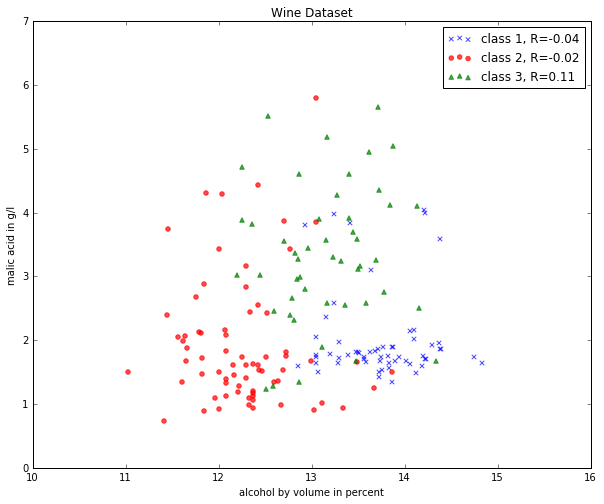

In [4]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):

    # Вычисление коэффициента корреляции Пирсона
    R = pearsonr(X_wine[:,0][y_wine == label], X_wine[:,1][y_wine == label])
    plt.scatter(x=X_wine[:,0][y_wine == label],
                y=X_wine[:,1][y_wine == label],
                marker=marker,
                color=color,
                alpha=0.7, 
                label='class {:}, R={:.2f}'.format(label, R[0]) # label for the legend
                )
    
plt.title('Wine Dataset')
plt.xlabel('alcohol by volume in percent')
plt.ylabel('malic acid in g/l')
plt.legend(loc='upper right')

plt.show()

Также можно визуализировать и три признака

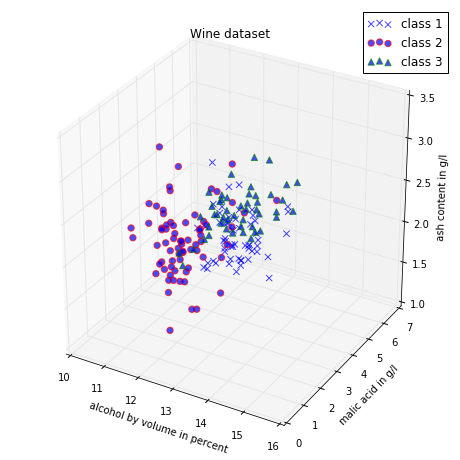

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
   
for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):
    
    ax.scatter(X_wine[:,0][y_wine == label], 
               X_wine[:,1][y_wine == label], 
               X_wine[:,2][y_wine == label],  
               marker=marker, 
               color=color, 
               s=40, 
               alpha=0.7,
               label='class {}'.format(label))

ax.set_xlabel('alcohol by volume in percent')
ax.set_ylabel('malic acid in g/l')
ax.set_zlabel('ash content in g/l')
plt.legend(loc='upper right')
plt.title('Wine dataset')
     
plt.show()

### Получение обучающего и тестовых наборов

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Random split
# Тестовый набор - 30%
# Обучающий набор - 70%
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
     test_size=0.30, random_state=123)

In [7]:
print('Доли каждого из классов')
        
print('\nОбучающий набор:')    
for l in range(1,4):
    print('Класс {:}: {:.2%}'.format(l, list(y_train).count(l)/y_train.shape[0]))
    
print('\nТестовый набор:')     
for l in range(1,4):
    print('Класс {:}: {:.2%}'.format(l, list(y_test).count(l)/y_test.shape[0]))

Доли каждого из классов

Обучающий набор:
Класс 1: 36.29%
Класс 2: 42.74%
Класс 3: 20.97%

Тестовый набор:
Класс 1: 25.93%
Класс 2: 33.33%
Класс 3: 40.74%


Стандартизация данных с целью получения нормального распределения

In [8]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

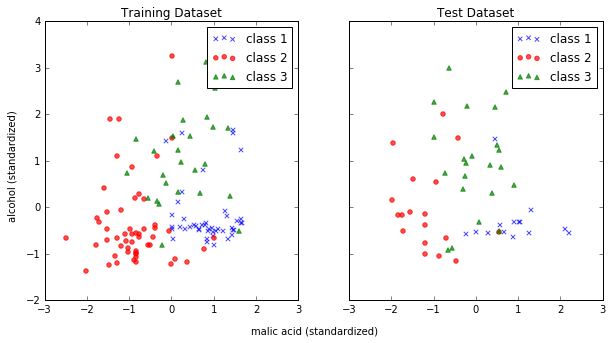

In [9]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,5))

for a,x_dat, y_lab in zip(ax, (X_train, X_test), (y_train, y_test)):

    for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue','red','green')):

        a.scatter(x=x_dat[:,0][y_lab == label], 
                y=x_dat[:,1][y_lab == label], 
                marker=marker, 
                color=color,   
                alpha=0.7,   
                label='class {}'.format(label)
                )

    a.legend(loc='upper right')

ax[0].set_title('Training Dataset')
ax[1].set_title('Test Dataset')
f.text(0.5, 0.04, 'malic acid (standardized)', ha='center', va='center')
f.text(0.08, 0.5, 'alcohol (standardized)', ha='center', va='center', rotation='vertical')

plt.show()

### Линейный дискриминантный анализ

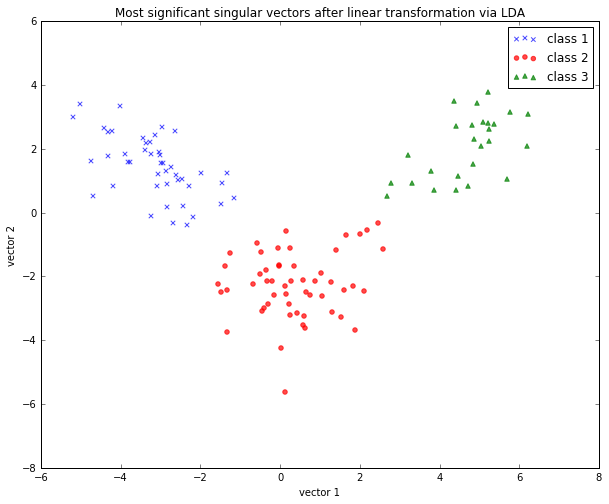

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
sklearn_transf = sklearn_lda.fit_transform(X_train, y_train)

plt.figure(figsize=(10,8))

for label,marker,color in zip(
        range(1,4),('x', 'o', '^'),('blue', 'red', 'green')):


    plt.scatter(x=sklearn_transf[:,0][y_train == label],
                y=sklearn_transf[:,1][y_train == label], 
                marker=marker, 
                color=color,
                alpha=0.7, 
                label='class {}'.format(label)
                )

plt.xlabel('vector 1')
plt.ylabel('vector 2')

plt.legend()
# Визуализация разбиения классов после линейного преобразования LDA
plt.title('Most significant singular vectors after linear transformation via LDA')

plt.show()

In [11]:
# Обучение модели
lda_clf = LDA()
lda_clf.fit(X_train, y_train)
LDA(n_components=None, priors=None)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [12]:
from sklearn import metrics
pred_train = lda_clf.predict(X_train)

print('Точность классификации на обучающем наборе данных')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

Точность классификации на обучающем наборе данных
100.00%


In [13]:
pred_test = lda_clf.predict(X_test)

print('Точность классификации на тестовом наборе данных')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test)))

Точность классификации на тестовом наборе данных
98.15%
